In [14]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')  # make sure we can import from our package

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from data_pipeline.fetch_census_data import acs5_aggregate 
from data_pipeline import spatial_operations as so
from data_pipeline import interactive_mapping as im
import numpy as np
import pandas as pd
from IPython.display import display
import geopandas as gpd
import os


In [ ]:
tract_data = acs5_aggregate()[["estimated total population","tract"]]
tract_data['population'] = tract_data['estimated total population']
tract_data = tract_data.drop(columns='estimated total population')
tract_data.head()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]  # add more space
so.simple_map(tract_data,'population','tract')

Nice. That's a correct map of Chicago tracts (note the clear lakeshore boundary) and correct 2019 population.

Now we want to rewrite the shapefile to have the right columns.

In [4]:
tract_shapefile = '/Users/drewkeller/Desktop/CS/broadbandequity/geo/tracts.shp'

In [ ]:
geo = gpd.read_file(tract_shapefile)
geo

In [46]:
geo = gpd.read_file('/Users/drewkeller/Desktop/ChTr0812/ChTr0812.shp')
geo

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,community,geometry
0,37281.254752,6.177154e+07,0.000000,60840000,840000,60,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
1,6102.900390,1.777035e+06,0.000000,76840801,840801,76,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
2,16035.054991,8.947394e+06,0.320945,59840300,840300,59,"POLYGON ((-87.67528 41.83039, -87.67552 41.830..."
3,14719.012184,8.946045e+06,0.320896,60840200,840200,60,"POLYGON ((-87.64160 41.84630, -87.64159 41.846..."
4,15186.400644,1.230614e+07,0.441424,34841100,841100,34,"POLYGON ((-87.62935 41.85295, -87.62935 41.852..."
...,...,...,...,...,...,...,...
804,13232.831455,1.060785e+07,0.380506,63630300,630300,63,"POLYGON ((-87.70377 41.80082, -87.70375 41.800..."
805,10648.157958,7.085428e+06,0.254156,63630400,630400,63,"POLYGON ((-87.69380 41.79369, -87.69404 41.793..."
806,10637.040410,7.079999e+06,0.253961,63630500,630500,63,"POLYGON ((-87.68422 41.80115, -87.68422 41.800..."
807,10625.328587,7.059211e+06,0.253215,63630800,630800,63,"POLYGON ((-87.69360 41.78641, -87.69384 41.786..."


In [47]:
# remove unneeded columns
geo = geo[[
    'Shape_Leng','Shape_Area','SqMiles','GEOID2','tract','geometry'
    ]]

In [48]:
# rename columns
geo = geo.rename(columns={
    "tract" : "tract",})
geo

,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,geometry
0,37281.254752,6.177154e+07,0.000000,60840000,840000,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
1,6102.900390,1.777035e+06,0.000000,76840801,840801,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
2,16035.054991,8.947394e+06,0.320945,59840300,840300,"POLYGON ((-87.67528 41.83039, -87.67552 41.830..."
3,14719.012184,8.946045e+06,0.320896,60840200,840200,"POLYGON ((-87.64160 41.84630, -87.64159 41.846..."
4,15186.400644,1.230614e+07,0.441424,34841100,841100,"POLYGON ((-87.62935 41.85295, -87.62935 41.852..."
...,...,...,...,...,...,...
804,13232.831455,1.060785e+07,0.380506,63630300,630300,"POLYGON ((-87.70377 41.80082, -87.70375 41.800..."
805,10648.157958,7.085428e+06,0.254156,63630400,630400,"POLYGON ((-87.69380 41.79369, -87.69404 41.793..."
806,10637.040410,7.079999e+06,0.253961,63630500,630500,"POLYGON ((-87.68422 41.80115, -87.68422 41.800..."
807,10625.328587,7.059211e+06,0.253215,63630800,630800,"POLYGON ((-87.69360 41.78641, -87.69384 41.786..."


In [49]:
# write to shapefile
geo.to_file(tract_shapefile)

In [50]:
# reload to check
geo = gpd.read_file(tract_shapefile)
geo

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,geometry
0,37281.254752,6.177154e+07,0.000000,60840000,840000,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
1,6102.900390,1.777035e+06,0.000000,76840801,840801,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
2,16035.054991,8.947394e+06,0.320945,59840300,840300,"POLYGON ((-87.67528 41.83039, -87.67552 41.830..."
3,14719.012184,8.946045e+06,0.320896,60840200,840200,"POLYGON ((-87.64160 41.84630, -87.64159 41.846..."
4,15186.400644,1.230614e+07,0.441424,34841100,841100,"POLYGON ((-87.62935 41.85295, -87.62935 41.852..."
...,...,...,...,...,...,...
804,13232.831455,1.060785e+07,0.380506,63630300,630300,"POLYGON ((-87.70377 41.80082, -87.70375 41.800..."
805,10648.157958,7.085428e+06,0.254156,63630400,630400,"POLYGON ((-87.69380 41.79369, -87.69404 41.793..."
806,10637.040410,7.079999e+06,0.253961,63630500,630500,"POLYGON ((-87.68422 41.80115, -87.68422 41.800..."
807,10625.328587,7.059211e+06,0.253215,63630800,630800,"POLYGON ((-87.69360 41.78641, -87.69384 41.786..."


In [23]:
so.simple_map(geo,'population','tract')

ValueError: You have multiple data points for the same geographical unit. Combine these data points and try again.

But there's a problem still - we have duplicate tracts??

In [51]:
len(geo.tract)

809

In [25]:
len(set(geo.tract))

808

There's one duplicate. K.

In [26]:
geo.drop_duplicates()

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:117: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,geometry
0,37281.254752,6.177154e+07,0.000000,60840000,840000,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
1,6102.900390,1.777035e+06,0.000000,76840801,840801,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
2,16035.054991,8.947394e+06,0.320945,59840300,840300,"POLYGON ((-87.67528 41.83039, -87.67552 41.830..."
3,14719.012184,8.946045e+06,0.320896,60840200,840200,"POLYGON ((-87.64160 41.84630, -87.64159 41.846..."
4,15186.400644,1.230614e+07,0.441424,34841100,841100,"POLYGON ((-87.62935 41.85295, -87.62935 41.852..."
...,...,...,...,...,...,...
804,13232.831455,1.060785e+07,0.380506,63630300,630300,"POLYGON ((-87.70377 41.80082, -87.70375 41.800..."
805,10648.157958,7.085428e+06,0.254156,63630400,630400,"POLYGON ((-87.69380 41.79369, -87.69404 41.793..."
806,10637.040410,7.079999e+06,0.253961,63630500,630500,"POLYGON ((-87.68422 41.80115, -87.68422 41.800..."
807,10625.328587,7.059211e+06,0.253215,63630800,630800,"POLYGON ((-87.69360 41.78641, -87.69384 41.786..."


... but not an identical duplicate. Weird.

In [27]:
wheres_that_pesky_duplicate = geo.groupby(by='tract').count().reset_index()
wheres_that_pesky_duplicate

,tract,Shape_Leng,Shape_Area,SqMiles,GEOID2,geometry
0,010100,1,1,1,1,1
1,010201,1,1,1,1,1
2,010202,1,1,1,1,1
3,010300,1,1,1,1,1
4,010400,1,1,1,1,1
...,...,...,...,...,...,...
803,843700,1,1,1,1,1
804,843800,1,1,1,1,1
805,843900,1,1,1,1,1
806,980000,1,1,1,1,1


In [28]:
wheres_that_pesky_duplicate.geometry.argmax()

769

In [29]:
wheres_that_pesky_duplicate.iloc[769]

tract         840000
Shape_Leng         2
Shape_Area         2
SqMiles            2
GEOID2             2
geometry           2
Name: 769, dtype: object

In [30]:
geo_sorted = geo.sort_values(by='tract').reset_index()
geo_sorted

,index,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,geometry
0,284,9344.924409,3.947738e+06,0.141606,01010100,010100,"MULTIPOLYGON (((-87.67312 42.01939, -87.67336 ..."
1,53,9303.405025,5.430137e+06,0.194780,01010201,010201,"POLYGON ((-87.67685 42.01941, -87.67679 42.019..."
2,563,8288.382640,3.785758e+06,0.135796,01010202,010202,"POLYGON ((-87.67336 42.01937, -87.67312 42.019..."
3,285,9999.174511,5.057142e+06,0.181401,01010300,010300,"POLYGON ((-87.66387 42.01929, -87.66387 42.019..."
4,286,14775.727899,5.855808e+06,0.210049,01010400,010400,"POLYGON ((-87.65468 41.99833, -87.65500 41.998..."
...,...,...,...,...,...,...,...
804,127,19607.614814,1.359578e+07,0.487684,05843700,843700,"POLYGON ((-87.68826 41.94673, -87.68825 41.946..."
805,79,15935.894972,1.409588e+07,0.505622,61843800,843800,"POLYGON ((-87.63536 41.79448, -87.63540 41.794..."
806,159,26723.238309,1.657846e+07,0.594673,42843900,843900,"POLYGON ((-87.57155 41.78075, -87.57165 41.780..."
807,638,78301.198349,2.016751e+08,7.234127,76980000,980000,"MULTIPOLYGON (((-87.94001 41.99811, -87.94002 ..."


In [31]:
geo_sorted[769:771]

,index,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,geometry
769,0,37281.254752,6.177154e+07,0.000000,60840000,840000,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
770,201,15230.370980,6.368404e+06,0.228436,60840000,840000,"POLYGON ((-87.63614 41.83818, -87.63612 41.837..."


Hm. Based on Shape_Area and Shape_Leng, those are not really interchangeable. We don't like that. We're gonna have to map them and see which one is legit.

In [32]:
duplicates = geo_sorted[geo_sorted.tract=='840000']
duplicates

,index,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,geometry
769,0,37281.254752,6.177154e+07,0.000000,60840000,840000,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
770,201,15230.370980,6.368404e+06,0.228436,60840000,840000,"POLYGON ((-87.63614 41.83818, -87.63612 41.837..."


In [52]:
big_dup = duplicates[round(duplicates.Shape_Leng)==37281]
small_dup = duplicates[round(duplicates.Shape_Leng)==15230]

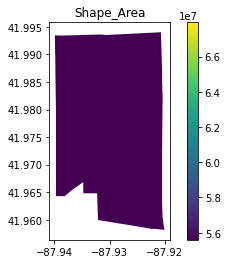

In [53]:
so.simple_map(big_dup,'Shape_Area','tract')

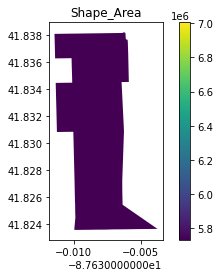

In [54]:
so.simple_map(small_dup,'Shape_Area','tract')

Where are these guys?

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

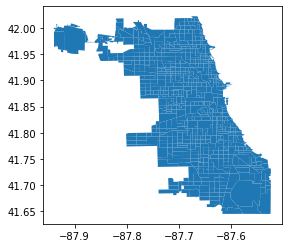

In [36]:
geo.plot()

"small_dup" is the right one; it's the in Bridgeport / Armour Square area. "big_dup" is the left tract in O'Hare and is resident-less.

In [56]:
# check we can filter "big_dup"
geo[(geo["tract"]=='840000') & (round(geo["Shape_Leng"])==37281)]


,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,geometry
0,37281.254752,6.177154e+07,0.0,60840000,840000,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."


In [58]:
# delete "big_dup"
geo = geo[(geo["tract"]!='840000') | (round(geo["Shape_Leng"])!=37281)]
geo

,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,geometry
1,6102.900390,1.777035e+06,0.000000,76840801,840801,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
2,16035.054991,8.947394e+06,0.320945,59840300,840300,"POLYGON ((-87.67528 41.83039, -87.67552 41.830..."
3,14719.012184,8.946045e+06,0.320896,60840200,840200,"POLYGON ((-87.64160 41.84630, -87.64159 41.846..."
4,15186.400644,1.230614e+07,0.441424,34841100,841100,"POLYGON ((-87.62935 41.85295, -87.62935 41.852..."
5,10472.230299,6.731931e+06,0.241476,31841200,841200,"POLYGON ((-87.67849 41.85894, -87.67848 41.858..."
...,...,...,...,...,...,...
804,13232.831455,1.060785e+07,0.380506,63630300,630300,"POLYGON ((-87.70377 41.80082, -87.70375 41.800..."
805,10648.157958,7.085428e+06,0.254156,63630400,630400,"POLYGON ((-87.69380 41.79369, -87.69404 41.793..."
806,10637.040410,7.079999e+06,0.253961,63630500,630500,"POLYGON ((-87.68422 41.80115, -87.68422 41.800..."
807,10625.328587,7.059211e+06,0.253215,63630800,630800,"POLYGON ((-87.69360 41.78641, -87.69384 41.786..."


In [59]:
# check there are now no duplicates
len(geo.tract) == len(set(geo.tract))

True

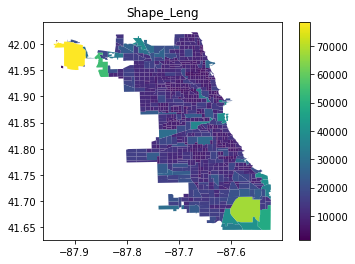

In [60]:
so.simple_map(geo,'Shape_Leng','tract')

One more thing. We can't have a "community_area" column in the tract shapefiles - turns out that causes all kinds of problems in the aggregation function. Let's get rid of it.

In [61]:
# write
geo.to_file(tract_shapefile)